<a href="https://colab.research.google.com/github/neeti777/Data-Analysis/blob/main/Working_with_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with open('/content/drive/My Drive/sample.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/sample.txt

Hello Google Drive!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('drive/My Drive/automobile_data__2022_final.csv')

In [7]:
print('Shape of the dataset is', data.shape)

Shape of the dataset is (159, 26)


In [8]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized_losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   body_style         159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non

In [10]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Text(0.5, 0, 'Make')

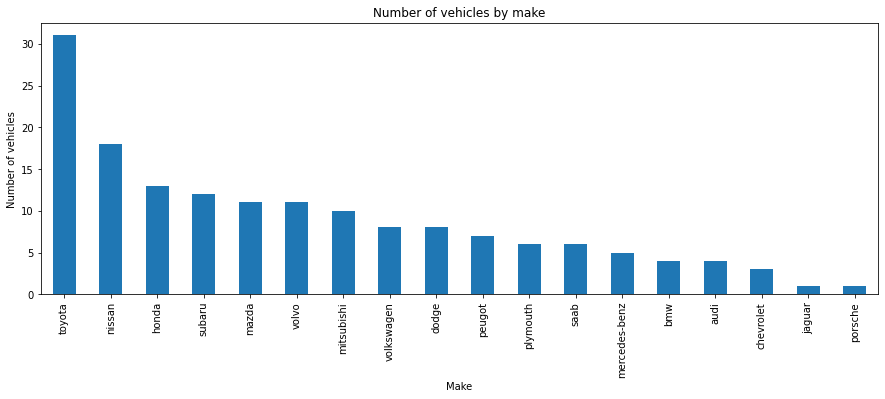

In [11]:
data.make.value_counts().plot(kind='bar', figsize=(15,5))

plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


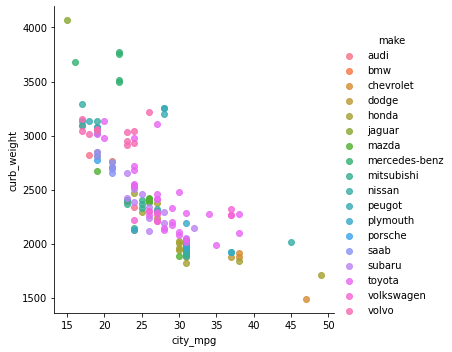

In [17]:
sns.lmplot('city_mpg','curb_weight',
            data, hue = 'make',
            fit_reg = False)

In [18]:
import altair as alt

In [19]:
plot = alt.Chart(data).mark_point().encode(
         x = 'horsepower',
         y = 'city_mpg',
         color = 'body_style').interactive()

In [20]:
plot

alt.Chart(...)

In [25]:
data = data.drop(['height', 'stroke', 'compression_ratio',
                  'num_of_doors', 'normalized_losses',
                  'engine_location','city_mpg'], axis=1)
data.head()



,symboling,make,fuel_type,aspiration,body_style,drive_wheels,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,horsepower,peak_rpm,highway_mpg,price
0,2,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,5500,30,13950
1,2,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,5500,22,17450
2,1,audi,gas,std,sedan,fwd,105.8,192.7,71.4,2844,ohc,five,136,mpfi,3.19,110,5500,25,17710
3,1,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,3086,ohc,five,131,mpfi,3.13,140,5500,20,23875
4,2,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,2395,ohc,four,108,mpfi,3.50,101,5800,29,16430


In [26]:
data = pd.get_dummies(data, drop_first=True)

data.head()

,symboling,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,peak_rpm,highway_mpg,price,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
0,2,99.8,176.6,66.2,2337,109,3.19,102,5500,30,13950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2,99.4,176.6,66.4,2824,136,3.19,115,5500,22,17450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,105.8,192.7,71.4,2844,136,3.19,110,5500,25,17710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,105.8,192.7,71.4,3086,131,3.13,140,5500,20,23875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,2,101.2,176.8,64.8,2395,108,3.50,101,5800,29,16430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop('price', axis = 1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1330.6219075897088
3390806.9514486305
0.874657542988818


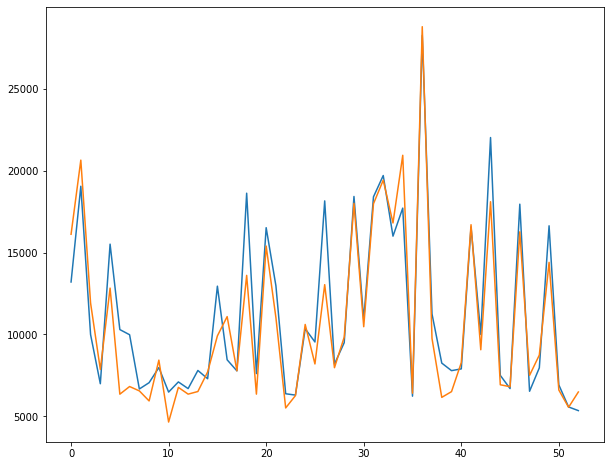

In [31]:
plt.figure(figsize=(10, 8))

plt.plot(y_test.values)
plt.plot(pred)